# THE TITANIC SURVIVAL PREDICTION

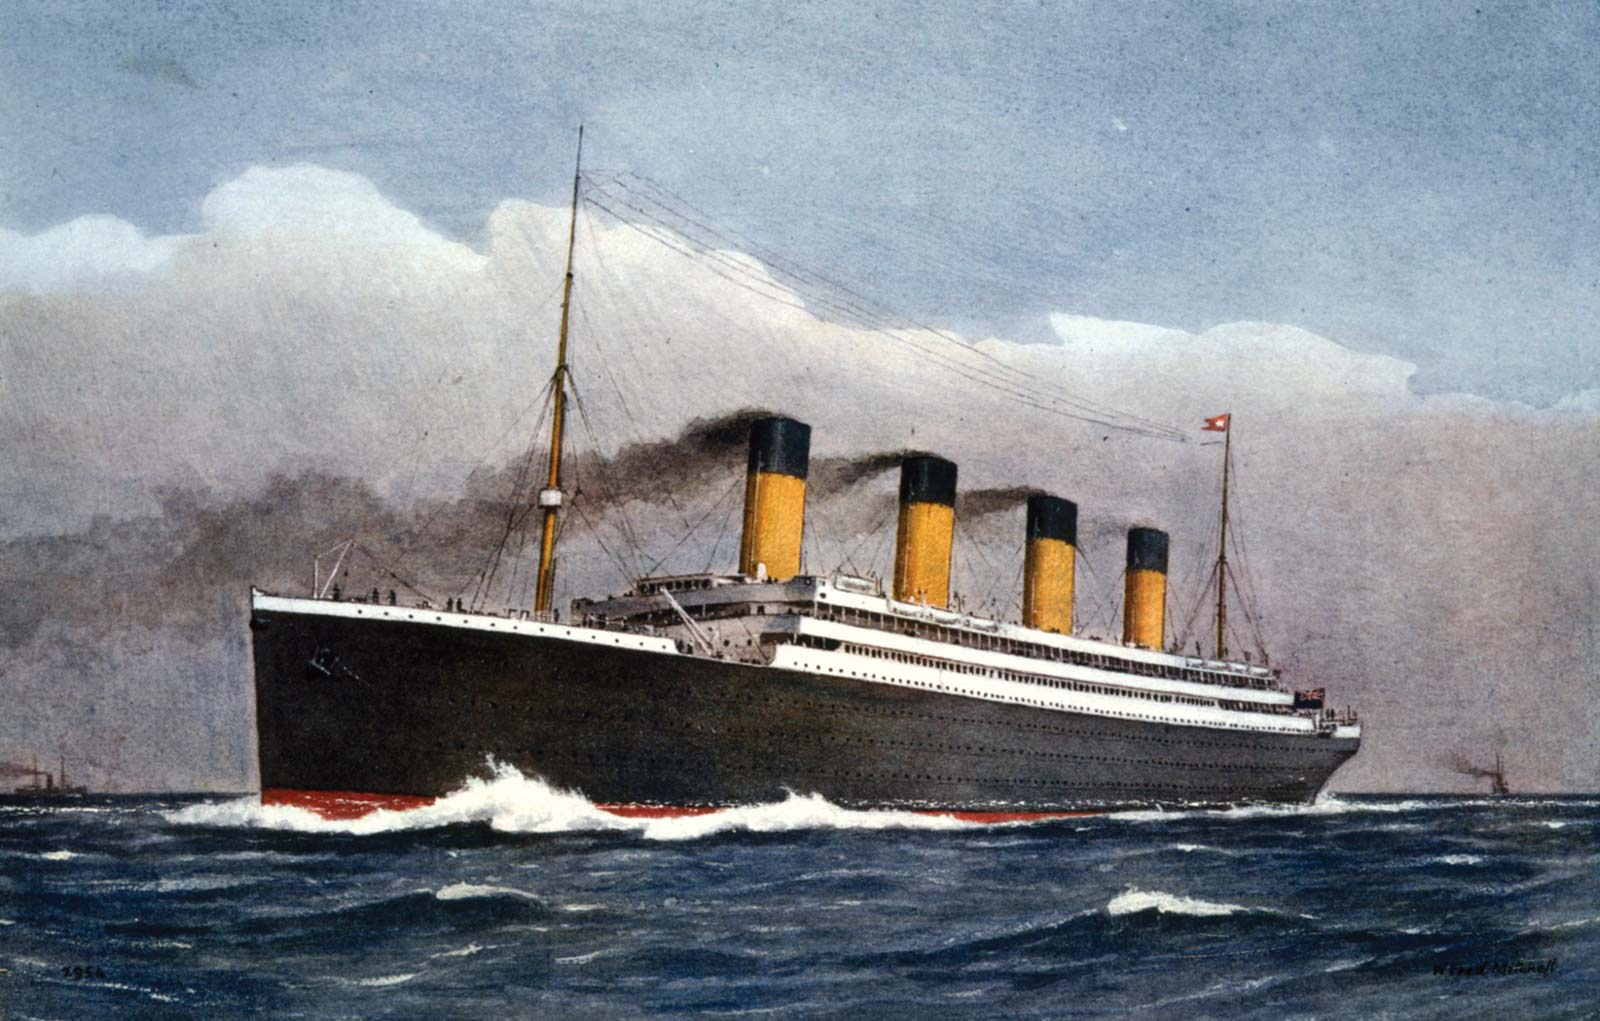

# THE PROCEDURE

* Step 1 : Understand the problem
* Step 2 : Understand the data
* Step 3 : Importing libraries/packages and datasets
* Step 4 : Data exploration
* Step 5 : Data preparation
* Step 6 : Training machine learning models
* Step 7 : Model validation
* Step 8 : Prediction
* Step 9 : Export predicted results and trained model

## 1 - UNDERSTAND THE PROBLEM

This is a competition organized by Kaggle (a practice for beginner) - The Legendary Titanic Machine Learning Competition. 

Link to the competition: https://www.kaggle.com/c/titanic

###### The Challenge:
Build a predictive model that answers the question: "what sorts of people were more likely to survive? "

###### The Objective:
Predict whether a passenger survived the sinking of the Titanic. 

## 2 - UNDERSTAND THE DATA

* This competition provided 2 set of data, such as train set and test set. 
* The train set contained 891 records and 12 features.
* The test set contained 481 records and 11 features.
* The missing feature in test set is the "Survived" feature, which is the target variable, where have to be predicted through the trained model. 

Link to the datasets: https://www.kaggle.com/competitions/titanic/data?select=train.csv

###### Data Dictionary:

Features | Definition | Description of categorical data
:----------|:---------|:----------
PassengerId|Identification number of passenger|-
Survived|Survival record (target)|0 : No, 1 : Yes
Pclass|Class of ticket|1 : 1st(Upper), 2 : 2nd(Middle), 3 : 3rd(Lower)
Name|Name of passenger|-
Sex|Gender of passenger|male, female
Age|Age of passenger|-
SibSp|Number of siblings and/or spouses aboard together|-
Parch|Number of parents and/or children aboard together|-
Ticket|Ticket number/code|-
Fare|Passenger fare|-
Cabin|Cabin number/code|-
Embarked|Embarked Port|C : Cherbourg, Q : Queenstown, S : Southampton

## 3 - IMPORT LIBRARIES AND DATASETS

###### 3.1 Importing libraries/packages

In [1]:
# Import commonly used libraries/packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# !pip install sweetviz
import sweetviz

# Import preprocessing libraries/packages for data preparation
from sklearn.preprocessing import MinMaxScaler

# Import machine learning algorithms for model training
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

# Import metrics for model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Import search algorithms for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from pprint import pprint

# Import pickle package to save model
import pickle

print('All libraries/packages imported successfully!')

All libraries/packages imported successfully!


###### 3.2 Load and Preview the Datasets

In [2]:
# Load train dataset

train_df = pd.read_csv('titanic_train_data.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load test dataset

test_df = pd.read_csv('titanic_test_data.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 4 - DATA EXPLORATION

##### 4.1 Size of Datasets

In [4]:
# Check the number of rows and features in train and test datasets

print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


##### 4.2 Data Types

In [5]:
# Check the details of train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check the details of test dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*integer*: 5 [PassengerId, Survived, Pclass, SibSp, Parch]

*float* : 2 [Age, Fare]

*object* : 5 [Name, Sex, Ticket, Cabin, Embarked]

##### 4.3 Missing Data

In [7]:
# Check for missing data in train dataset

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check for missing data in test dataset

test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* "Age", "Cabin" and "Embarked" found missing data in both train ans test datasets
* Since "Cabin" contained huge amount of missing data, this feature can be considered to be excluded for training the model
* "Embarked" contained only 2 missing value, hence those 2 rows can be excluded
* Since "Age" contained less than 20% of missing value and it bring meaning to the analysis, the missing value is hence should be replaced by meaningful values (median/mean)
* "Fare" is found a missing value in test dataset, hence it should be removed to avoid errors in later prediction

##### 4.4 Duplicated Data

In [9]:
# Check for duplicated data in train dataset

train_df.duplicated().sum()

0

In [10]:
# Check for duplicated data in test dataset

test_df.duplicated().sum()

0

* no duplicated data found in both train and test dataset

##### 4.5 Unique Data

In [11]:
# Check the total unique values of each feature in train dataset

train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
# Check the total unique values of each feature in test dataset

test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

* "PassengerId" and "Name" contained 100% unique values. Besides, "Ticket" contained more than 70% unique values. These features might bring meaningless to the prediction and will affect the results. Therefore, they should be excluded.

##### 4.6 Descriptive Statistics

In [13]:
# Summary of numerical data in train dataset

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summary of numerical data in test dataset

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Summary of categorical data in train dataset

train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Urho Abraham",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [16]:
# Summary of categorical data in test dataset

test_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Svensson, Mr. Johan Cervin",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


* In contrast, the minimum value of "Age" and maximum value of "Parch" in test dataset are outside the range of train dataset, which might be predicted wrongly as the model didn't learn from the data (may or may not occurred)

##### 4.7 Data Exploration through Visualization

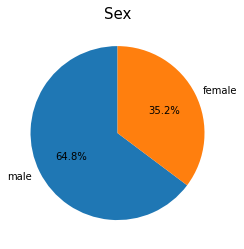

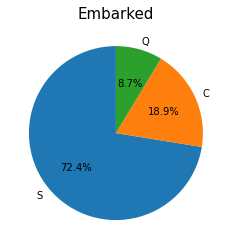

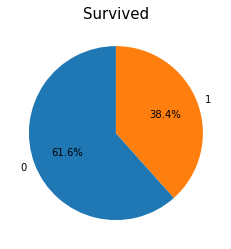

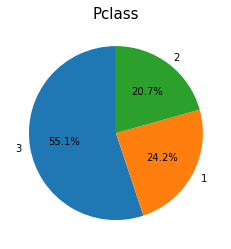

In [17]:
# Visualize categorical data through pie chart

cat = ['Sex','Embarked','Survived','Pclass']
for i in range (len(cat)):
    cat_val = train_df[cat[i]].value_counts()
    plt.pie(cat_val, labels=cat_val.index, autopct='%1.1f%%', startangle=90, 
            radius=1.0)
    plt.title(cat[i], fontsize=15)
    plt.show()

* The target feature "Survived" shown a bias of data, where 61.6% of titanic passengers were dead. By using this data to train the model might cause errors, hence the dataset should be resample to achieve better prediction accuracy (will be tested in later stage)
* Since target feature is biased, so are the other features.

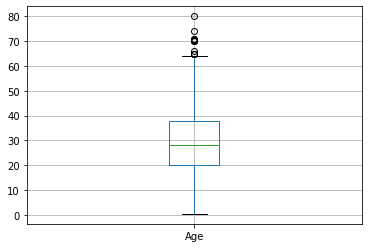

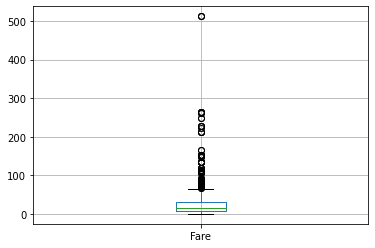

In [18]:
# Check outliers for continuous data

cont = [["Age"],["Fare"]]

for i in range (len(cont)):
    cont_col = cont[i]
    train_df[cont_col].boxplot()
    plt.show()

* All continuous data contained outliers, they should be rescale before training the model


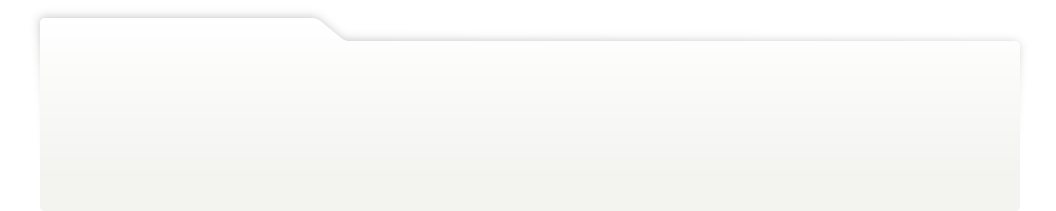
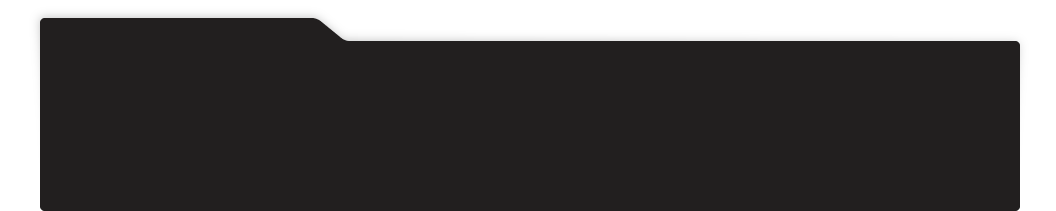
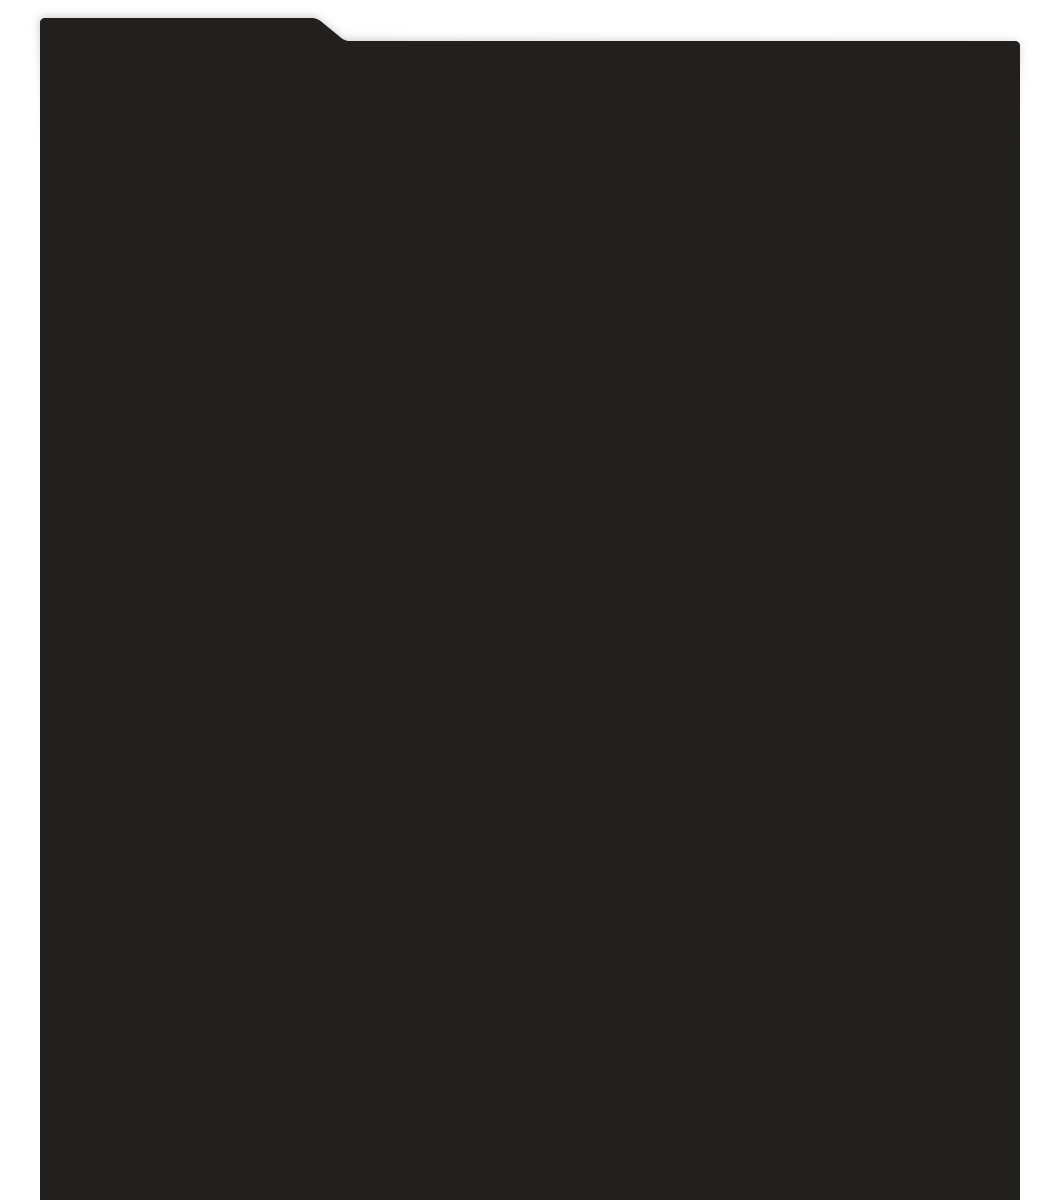
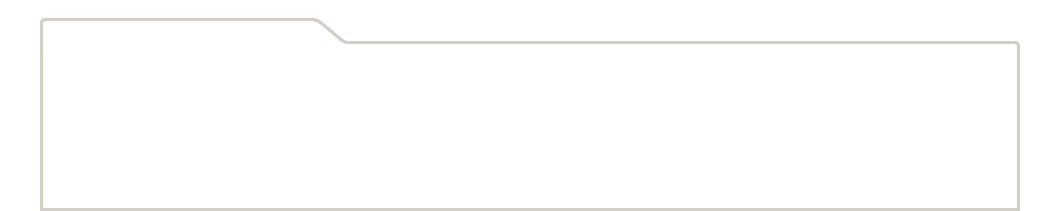
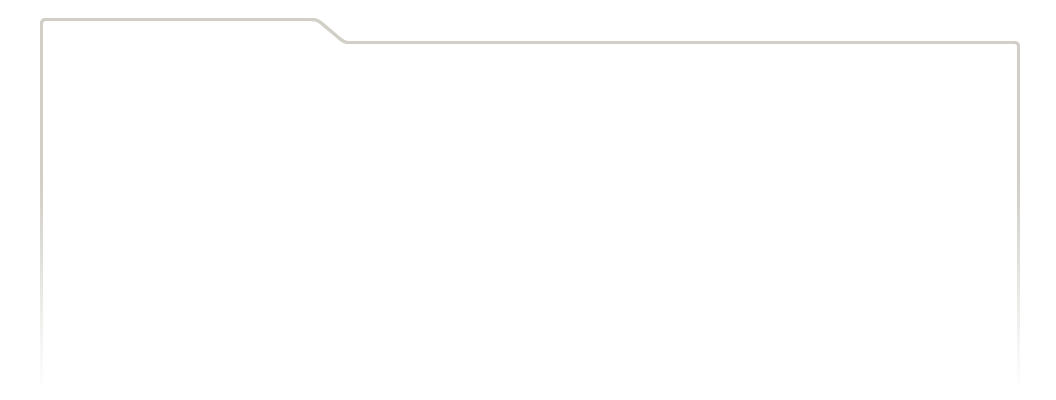
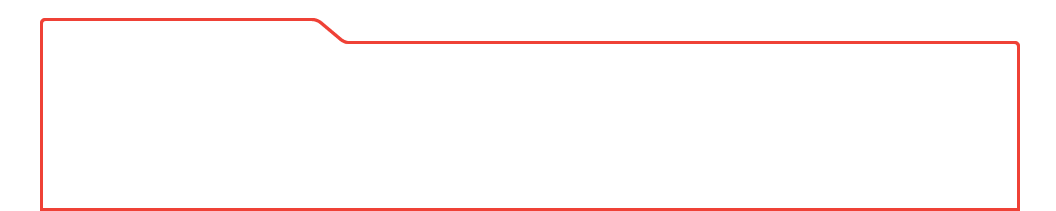
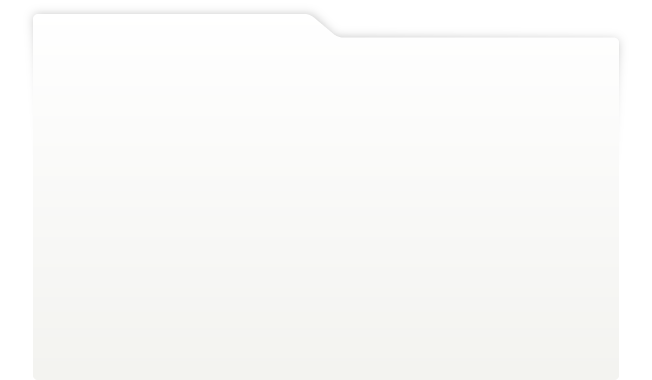
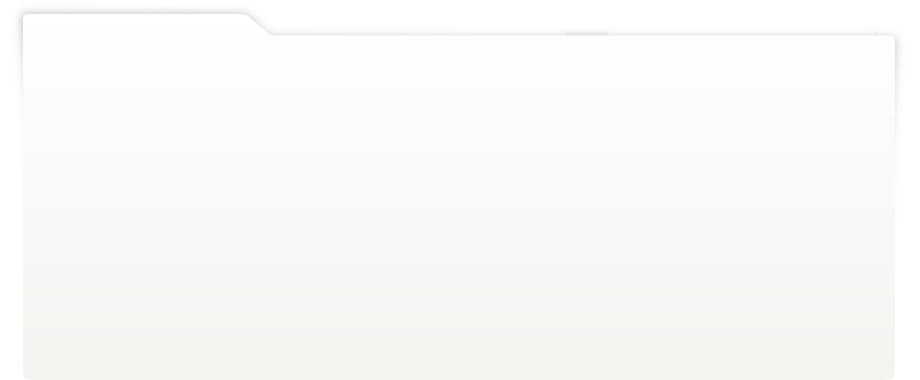
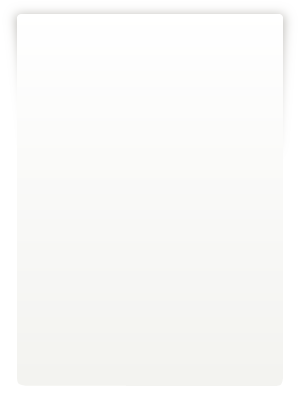
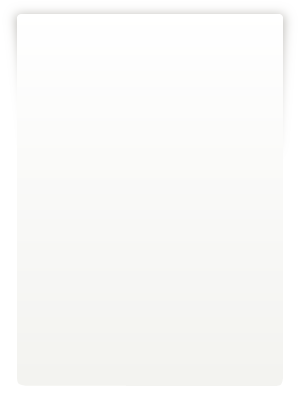
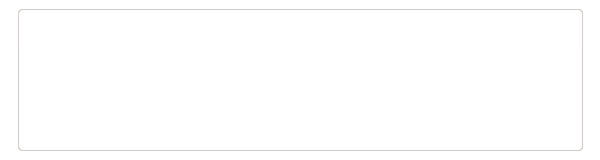
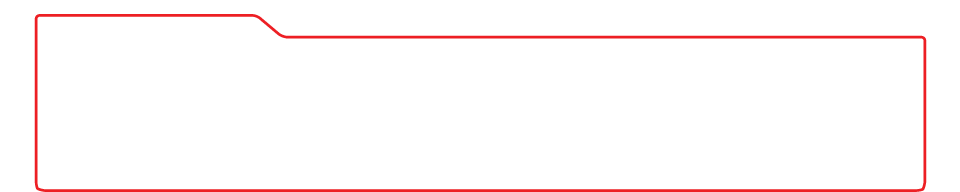
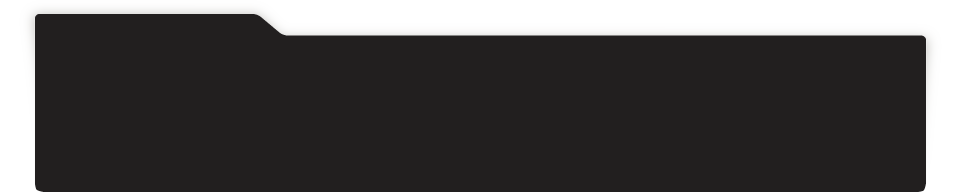
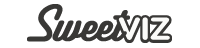
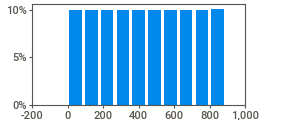
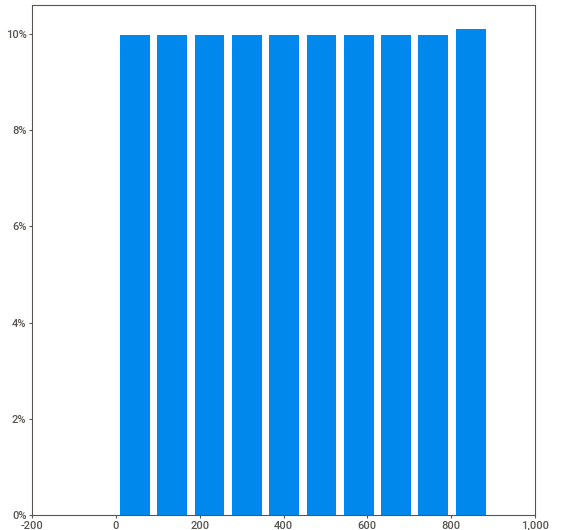
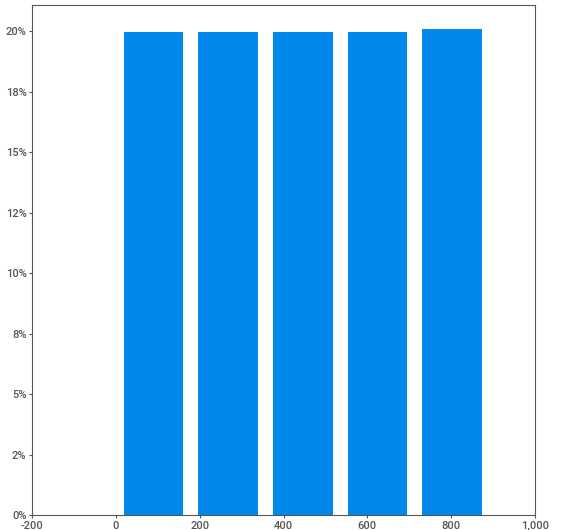
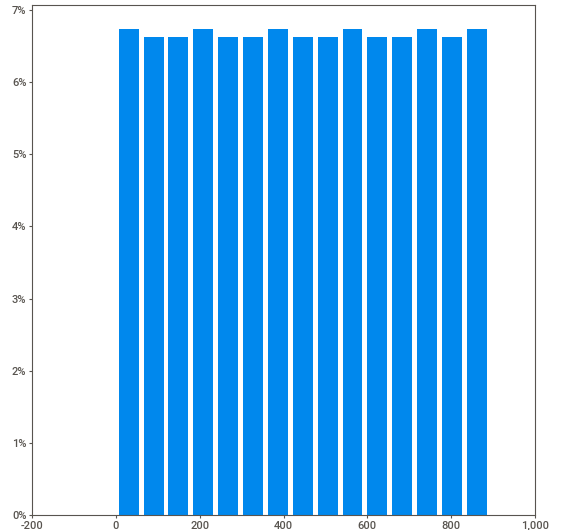
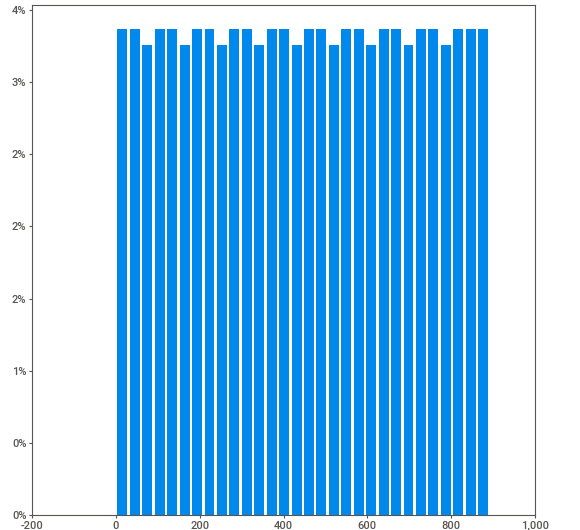
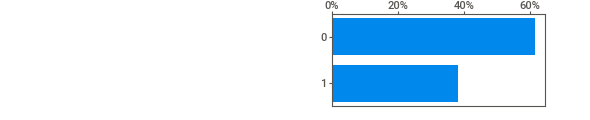
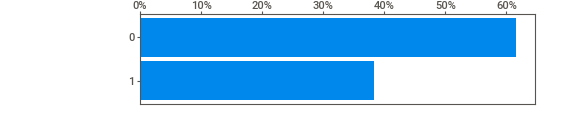
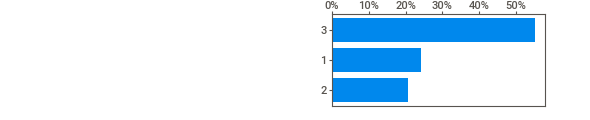
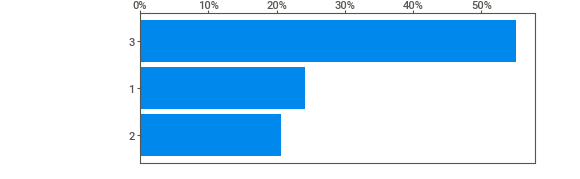
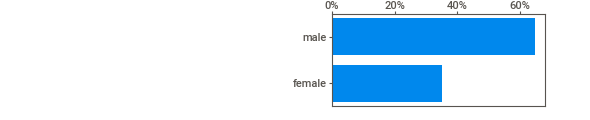
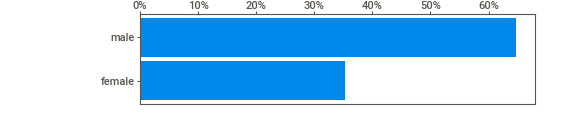
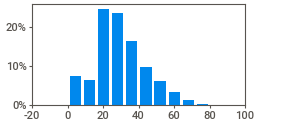
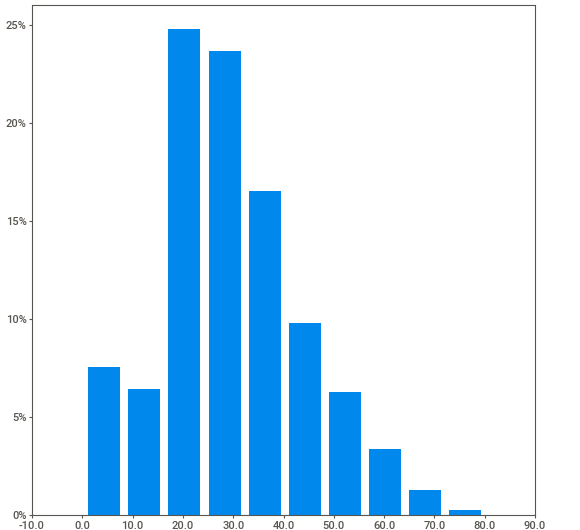
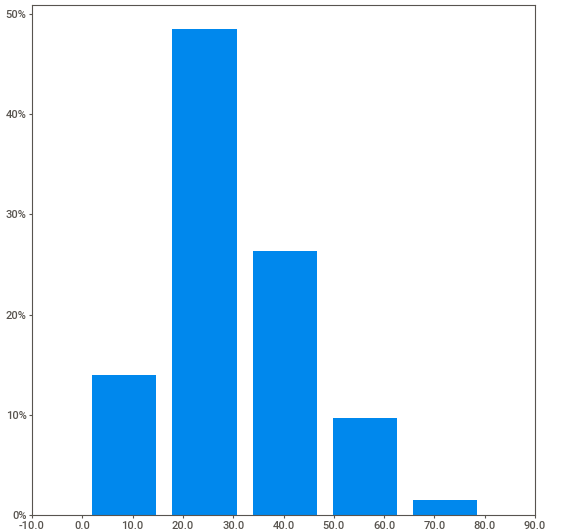
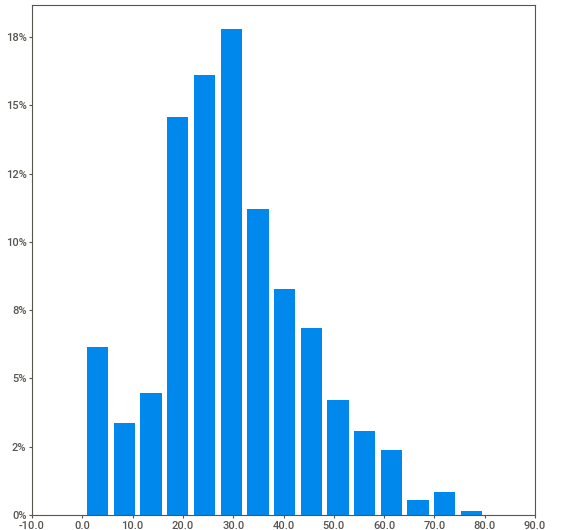
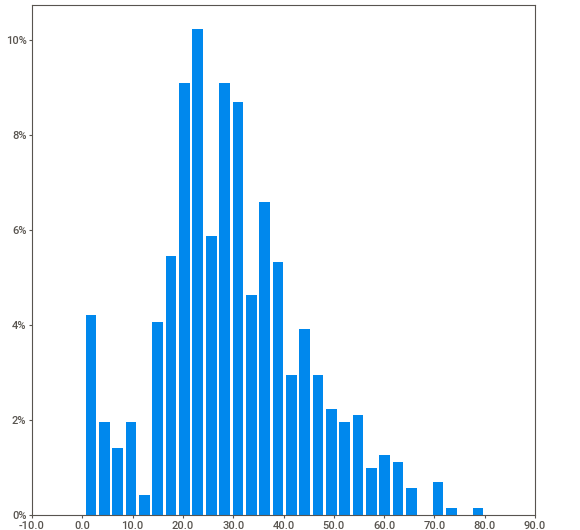
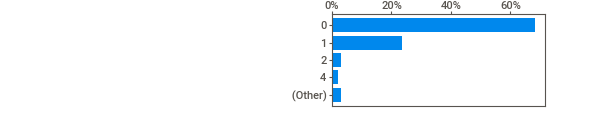
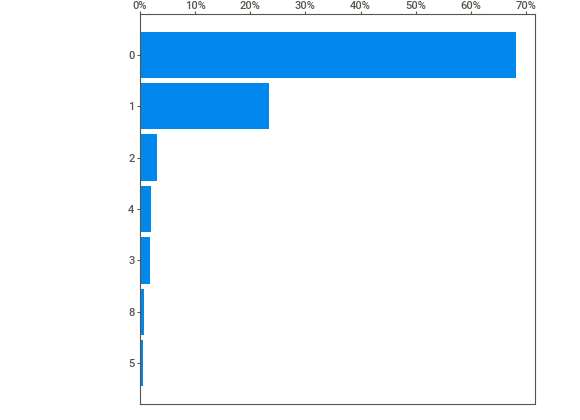
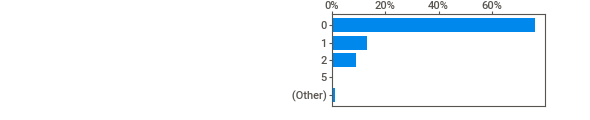
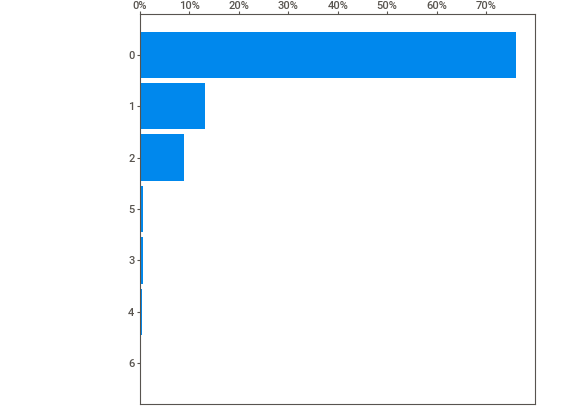
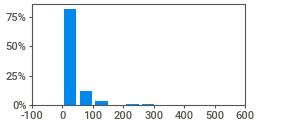
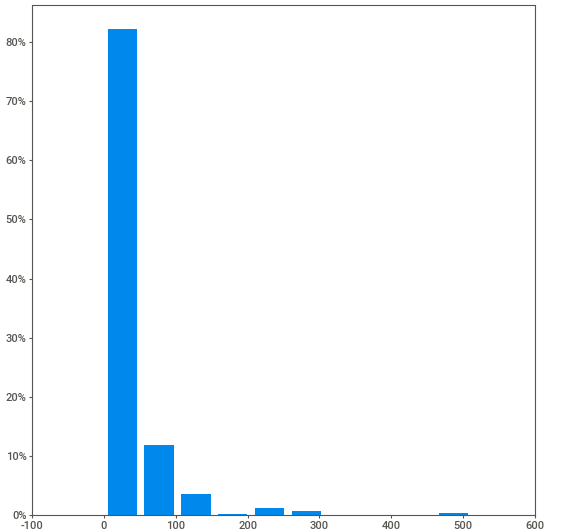
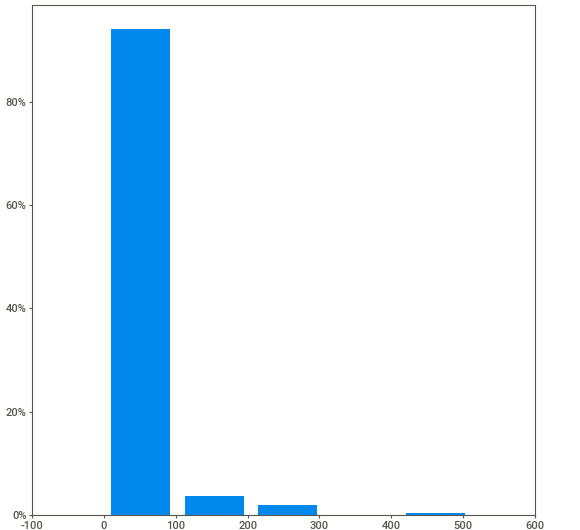
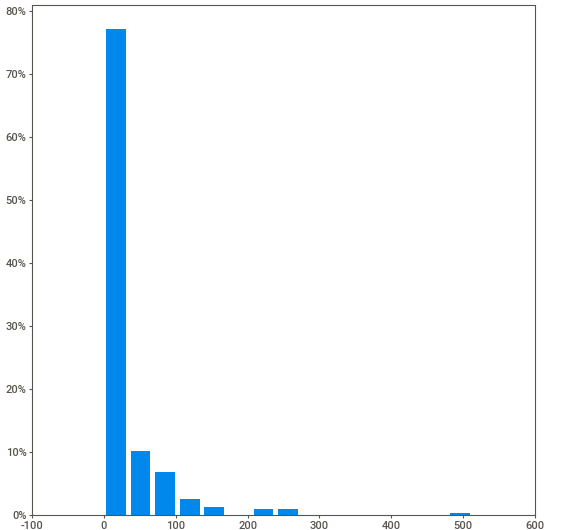
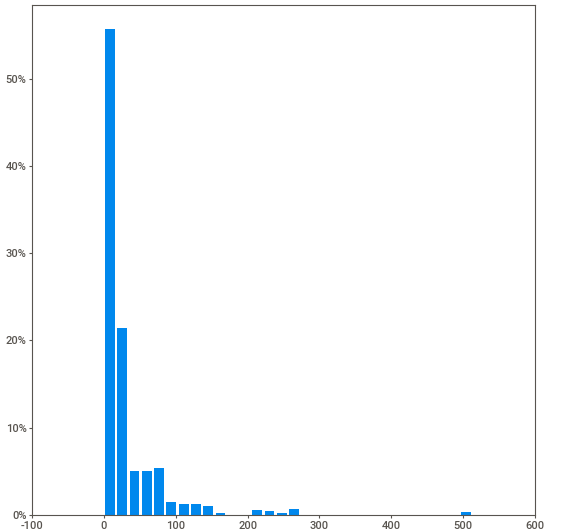
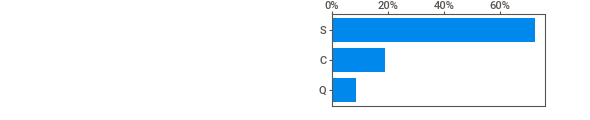
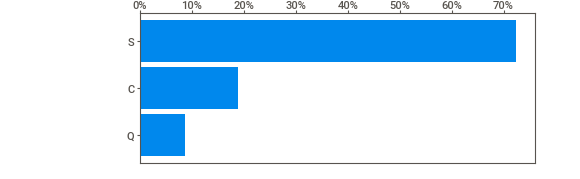
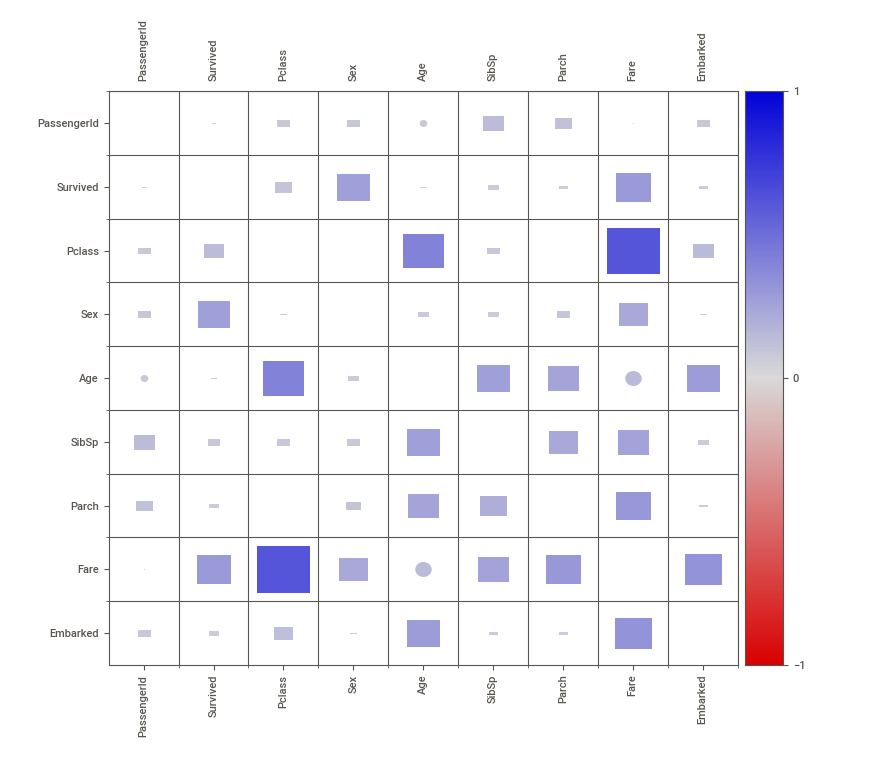
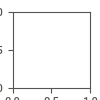

In [19]:
# Sweetviz provide a simple and fast data visualization report 
# for exploratory data analysis

report = sweetviz.analyze(train_df)
report.show_notebook()

###### *[Click on "ASSOCIATIONS" button]* 
* Based on the Sweetviz report, it was found that most of the features are not strongly correlated. Conversely, the "Pclass" and "Fare" shown the strongest correlation between each other *[Darker blue]*.

###### *[Click on "Pclass" --> View bottom right "CORRELATION RATIO WITH..."]* 
* From there, the exact correlation ratio was calculated as 0.59/59%. Since the ratio is still lower than 70%, it can be considered to remain for further prediction. However, both features bring the similar meaning, hence it is better to exclude one of it for training the model.

###### *Skewness*: 
* "Fare" is found to be right-skewed (4.79), which proven the largest outliers in previous boxplot. "Age", on the other hand, is considered as normally distributed, as the skewness is within the normal range +-0.5 (0.389).

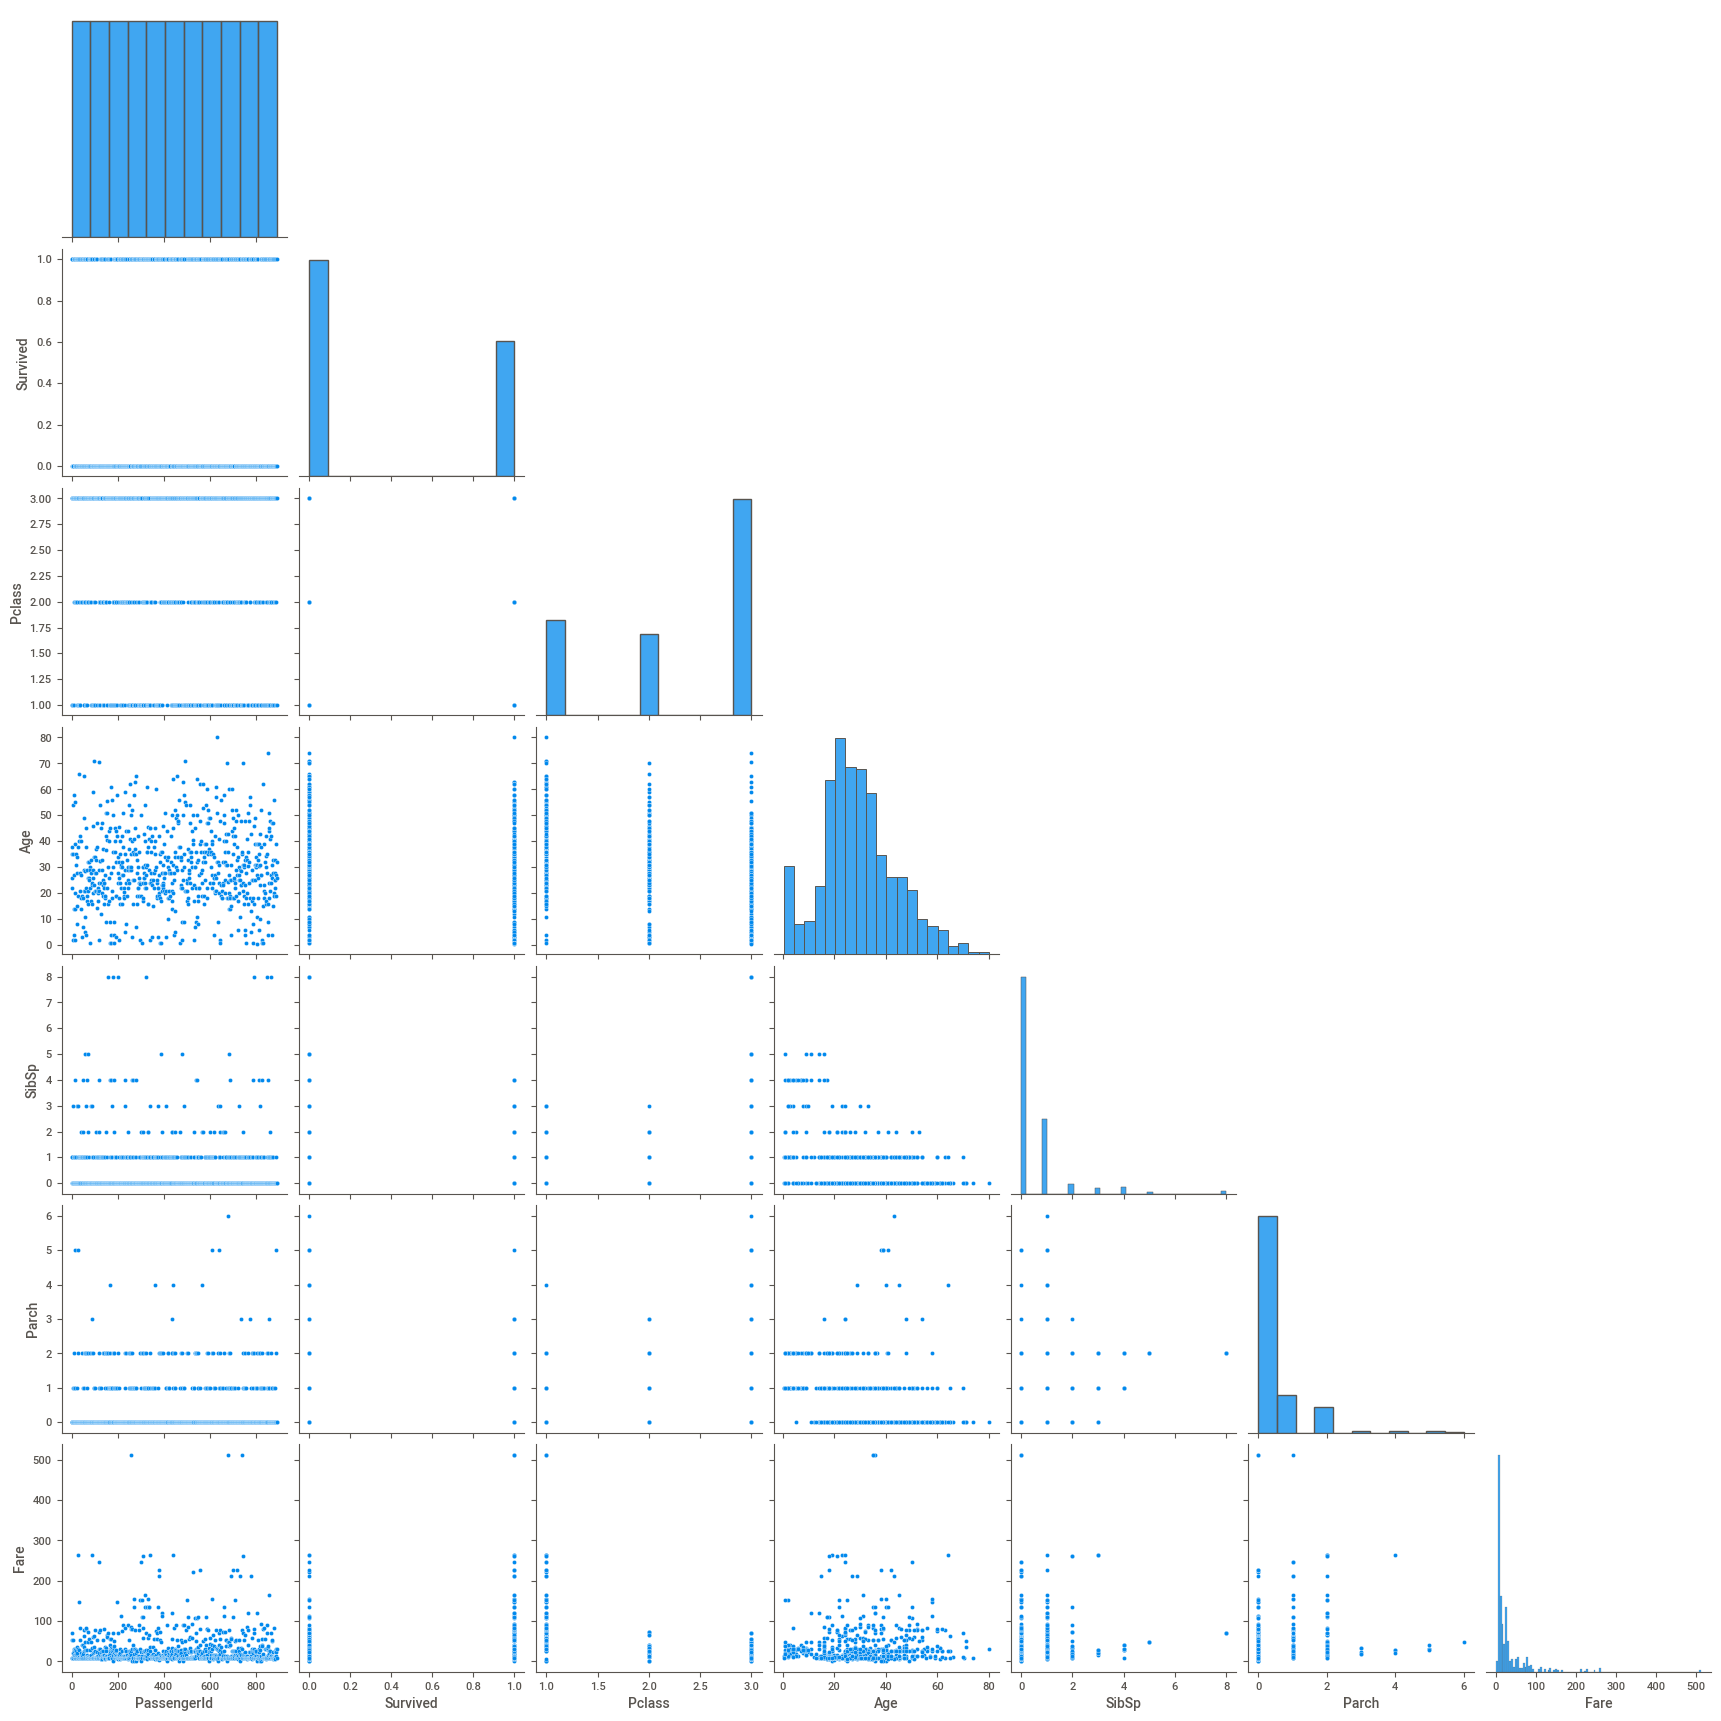

In [20]:
# Correlation checking through scatter plot 

sns.pairplot(train_df.iloc[:,:], corner=True)

* Similar as in Sweetviz report [but with scatter plots for double check], none of the features are strongly correlated (no linear pattern observed)
* In contrast, the strong correlation between "Pclass" and "Fare" is not present in this chart

## 5 - DATA PREPARATION

##### 5.1 Feature Selection

* "Cabin" contained large amount of missing values
* "PassengerId", "Name" and "Ticket" contained large amount of unique values
* It was found that there is "title" of each passenger were recorded in the "Name" feature, which can be used as a new feature, where classify the passenger into groups with match "title"
* Hence, the other 3 features will be excluded 

In [21]:
# Remove the unnecessary features

train_set = train_df.drop(columns = ['PassengerId','Ticket','Cabin'], axis=1)
train_set

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


##### 5.2 Handling Missing Data

* "Embarked" contained only 2 missing values
* "Fare" contained only 1 missing value in test dataset
* "Age" contained 20% missing values

In [22]:
# Replaced the null in "Age" by a random mean +- standard deviation

def replace_age(data):
    for dataset in data:
        mean = train_df['Age'].mean()
        std = train_df['Age'].std()
        is_null = train_df['Age'].isnull().sum()
        
        rand_age = np.random.randint(mean-std, mean+std, size=is_null)
        
        age_slice = train_df['Age'].copy()
        age_slice[np.isnan(age_slice)] = rand_age
        data['Age'] = age_slice
        
replace_age(train_set)
train_set.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,39.0,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


In [23]:
# Check the remaining null values in dataset

train_set.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [24]:
# Replace the null in "Embarked" by the mode value

embarked_common = 'S'
train_set['Embarked'].fillna(value=embarked_common, inplace=True)

# Check again the remaining null values
train_set.isnull().sum().sum()

0

In [25]:
# Replace the null in "Fare" by zeros (for test dataset)

train_set['Fare'].fillna(value=0, inplace=True)

train_set.isnull().sum().sum()

0

##### 5.3 Handling Outliers

* "Age" and "Fare" contained outliers
* Both continuous data can provide the similar meaning if group into interval, therefore, it is applied to reduce the outliers

###### 5.3.1 "Age"

In [26]:
# Group the age into bins

train_set['Age_Bins'] = pd.qcut(train_set['Age'], 5)
train_set[['Age_Bins','Survived']].groupby(['Age_Bins'], as_index=False).mean()

,Age_Bins,Survived
0,"(0.419, 19.0]",0.456410
1,"(19.0, 25.0]",0.343373
2,"(25.0, 32.0]",0.356757
3,"(32.0, 40.0]",0.396552
4,"(40.0, 80.0]",0.356725


In [27]:
# Check the total passengers in each age group

train_set['Age_Bins'].value_counts()

(0.419, 19.0]    195
(25.0, 32.0]     185
(32.0, 40.0]     174
(40.0, 80.0]     171
(19.0, 25.0]     166
Name: Age_Bins, dtype: int64

In [28]:
# Group the age bins with numerical ordinal values

def age_bins(data):
    data['Age'] = pd.cut(x = data['Age'], bins = [0,19,25,32,40,80],
                             labels=[0,1,2,3,4])
    data['Age'] = data['Age'].astype(int)    
age_bins(train_set)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Bins
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,"(19.0, 25.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,71.2833,C,"(32.0, 40.0]"
2,1,3,"Heikkinen, Miss. Laina",female,2,0,0,7.9250,S,"(25.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,53.1000,S,"(32.0, 40.0]"
4,0,3,"Allen, Mr. William Henry",male,3,0,0,8.0500,S,"(32.0, 40.0]"


In [29]:
# Drop the "Age_Bins" feature

train_set = train_set.drop(['Age_Bins'], axis=1)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,2,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,3,0,0,8.0500,S


* Tested with replacing missing value by mean of age directly and with/without grouping.
* Tested with replacing missing value by median of age directly and with/without grouping. 
* In contrast, replacing the age with randomized method as shown above given the best accuracy. 
* Besides, binning the age into 5 groups was tested as the best solution as well. 

###### 5.3.2 "Fare"

In [30]:
# Group the fare into bins into 5 orders

train_set['Fare_Bins'] = pd.qcut(train_set['Fare'], 5)
train_set[['Fare_Bins','Survived']].groupby(['Fare_Bins'], as_index=False).mean()

,Fare_Bins,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [31]:
# Check the total passengers in each fare group

train_set['Fare_Bins'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_Bins, dtype: int64

In [32]:
# Group the fare bins with numerical ordinal values

def fare_bins(data):
    data['Fare'] = pd.cut(x = data['Fare'], 
                               bins = [-1,7.854,10.5,21.679,39.688,513],
                             labels=[0,1,2,3,4])
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare'] = data['Fare'].astype(int)
fare_bins(train_set)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Bins
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S,"(-0.001, 7.854]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,4,C,"(39.688, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,2,0,0,1,S,"(7.854, 10.5]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,4,S,"(39.688, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,3,0,0,1,S,"(7.854, 10.5]"


In [33]:
# Drop the "Fare_Bins" feature

train_set = train_set.drop(['Fare_Bins'], axis=1)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,4,C
2,1,3,"Heikkinen, Miss. Laina",female,2,0,0,1,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,4,S
4,0,3,"Allen, Mr. William Henry",male,3,0,0,1,S


* Similarly, the 5 bins was tested as the best grouping for fare feature.

##### 5.4 Extract "Title" from "Name"

In [34]:
# Create a function to extract the title from name of passengers

titles = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

def replace_name(data):
    # Extract title from "Name"
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # Replace title
    data['Title'] = data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr.',
                                          'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    # Convert to numerical data
    data['Title'] = data['Title'].map(titles)
    # Fill null with 0
    data['Title'] = data['Title'].fillna(0)
    
replace_name(train_set)
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,4,C,3.0
2,1,3,"Heikkinen, Miss. Laina",female,2,0,0,1,S,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,4,S,3.0
4,0,3,"Allen, Mr. William Henry",male,3,0,0,1,S,1.0


In [35]:
# Drop "Name" feature

train_set = train_set.drop(['Name'], axis=1)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1,1,0,0,S,1.0
1,1,1,female,3,1,0,4,C,3.0
2,1,3,female,2,0,0,1,S,2.0
3,1,1,female,3,1,0,4,S,3.0
4,0,3,male,3,0,0,1,S,1.0


##### 5.5 Object Data Encoding

In [36]:
# Apply One Hot Encoding to replace the object data into dummies numerical data

train_set = pd.get_dummies(train_set, columns=['Sex','Embarked'])
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,0,1.0,0,1,0,0,1
1,1,1,3,1,0,4,3.0,1,0,1,0,0
2,1,3,2,0,0,1,2.0,1,0,0,0,1
3,1,1,3,1,0,4,3.0,1,0,0,0,1
4,0,3,3,0,0,1,1.0,0,1,0,0,1


##### 5.6 New Features

In [37]:
# Add "Not_Alone" and "Relatives"

'''0 : Not Alone
   1 : Alone'''

def add_notalone(data):
    data['Relatives'] = data['SibSp'] + data['Parch']

    data.loc[data['Relatives'] > 0, 'Not_Alone'] = 0
    data.loc[data['Relatives'] == 0, 'Not_Alone'] = 1

add_notalone(train_set)
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone
0,0,3,1,1,0,0,1.0,0,1,0,0,1,1,0.0
1,1,1,3,1,0,4,3.0,1,0,1,0,0,1,0.0
2,1,3,2,0,0,1,2.0,1,0,0,0,1,0,1.0
3,1,1,3,1,0,4,3.0,1,0,0,0,1,1,0.0
4,0,3,3,0,0,1,1.0,0,1,0,0,1,0,1.0


In [38]:
# Add "Fare per person" 

def add_fareperson(data):
    data['Fare_Per_Person'] = data['Fare']/(data['Relatives']+1)
    data['Fare_Per_Person'] = data['Fare_Per_Person'].astype(int)

add_fareperson(train_set)
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person
0,0,3,1,1,0,0,1.0,0,1,0,0,1,1,0.0,0
1,1,1,3,1,0,4,3.0,1,0,1,0,0,1,0.0,2
2,1,3,2,0,0,1,2.0,1,0,0,0,1,0,1.0,1
3,1,1,3,1,0,4,3.0,1,0,0,0,1,1,0.0,2
4,0,3,3,0,0,1,1.0,0,1,0,0,1,0,1.0,1


In [39]:
# Add "Age_Class"

def add_ageclass(data):
    data['Age_Class'] = data['Age']*data['Pclass']

add_ageclass(train_set)
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person,Age_Class
0,0,3,1,1,0,0,1.0,0,1,0,0,1,1,0.0,0,3
1,1,1,3,1,0,4,3.0,1,0,1,0,0,1,0.0,2,3
2,1,3,2,0,0,1,2.0,1,0,0,0,1,0,1.0,1,6
3,1,1,3,1,0,4,3.0,1,0,0,0,1,1,0.0,2,3
4,0,3,3,0,0,1,1.0,0,1,0,0,1,0,1.0,1,9


##### 5.7 Data Scalling

In [40]:
# Apply MinMaxScaler to scale all the data in between 0 and 1

mm = MinMaxScaler()
to_mm = ['Pclass','Age','SibSp','Parch','Fare','Title','Relatives',
         'Fare_Per_Person','Age_Class']
train_set[to_mm] = mm.fit_transform(train_set[to_mm])
train_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person,Age_Class
0,0,1.0,0.25,0.125,0.0,0.00,0.2,0,1,0,0,1,0.1,0.0,0.00,0.25
1,1,0.0,0.75,0.125,0.0,1.00,0.6,1,0,1,0,0,0.1,0.0,0.50,0.25
2,1,1.0,0.50,0.000,0.0,0.25,0.4,1,0,0,0,1,0.0,1.0,0.25,0.50
3,1,0.0,0.75,0.125,0.0,1.00,0.6,1,0,0,0,1,0.1,0.0,0.50,0.25
4,0,1.0,0.75,0.000,0.0,0.25,0.2,0,1,0,0,1,0.0,1.0,0.25,0.75


In [41]:
# Check the transform data of each feature (should be in [0,1])

train_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person,Age_Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.488777,0.065376,0.063599,0.501122,0.337823,0.352413,0.647587,0.188552,0.086420,0.725028,0.090460,0.602694,0.291526,0.350542
std,0.486592,0.418036,0.355752,0.137843,0.134343,0.350159,0.199875,0.477990,0.477990,0.391372,0.281141,0.446751,0.161346,0.489615,0.286324,0.288999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.250000,0.000000,0.000000,0.250000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
50%,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.200000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.250000,0.250000
75%,1.000000,1.000000,0.750000,0.125000,0.000000,0.750000,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.100000,1.000000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 5.8 Group All Preparation Code for Deployment

In [42]:
# Create a function that group all the data cleaning procedures

def prep(data): 

    # Remove the unnecessary features
    data_prep = data.drop(columns = ['PassengerId','Ticket','Cabin'], axis=1)
    
    # Replace the missing values in "Age" with mean value
    replace_age(data_prep)
    # Replace the missing values in "Embarked"
    data_prep['Embarked'].fillna(value=embarked_common, inplace=True)
    # Replace the missing values in "Fare"
    data_prep['Fare'].fillna(value=0, inplace=True)
    
    # Replace "Name" by "Titles"
    replace_name(data_prep)
    data_prep = data_prep.drop(['Name'], axis=1)

    # Group the age and fare into bins
    age_bins(data_prep)
    fare_bins(data_prep)    

    # Apply One Hot Encoding to replace the object data into dummies numerical data
    data_prep = pd.get_dummies(data_prep, columns=['Sex','Embarked'])
    data_prep.fillna(0)
    
    # Add new features
    add_notalone(data_prep)
    add_fareperson(data_prep)
    add_ageclass(data_prep)

    # Scale the data values
    data_prep[to_mm] = mm.transform(data_prep[to_mm])

    return data_prep

## 6 - TRAINING MACHINE LEARNING MODELS

###### 6.1 Prepare dataset for model training

In [43]:
# Split the target column out from train dataset

x = train_set.drop(['Survived'], axis=1)
y = train_set['Survived']
print(x.shape, y.shape)

(891, 15) (891,)


In [44]:
# Check total target values
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [45]:
# Split the train dataset into pre-train and pre-validate datasets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=2)
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (712, 15)
x_test:  (179, 15)
y_train:  (712,)
y_test:  (179,)


###### 6.2 Train the Models

###### 6.2.1 Test with Stochastic Gradient Descent (sgd)

In [46]:
# Train the SGD model

sgd = SGDClassifier()
sgd.fit(x_train,y_train)
y_sgd = sgd.predict(x_test)

# Get the accuracy score of prediction

ac_sgd = round(sgd.score(x_train,y_train),4)
print("Accuracy Score: ", ac_sgd*100, "%")

Accuracy Score:  79.78 %


###### 6.2.2 Test with Naive Bayes (nb)

In [47]:
# Train the NB model

nb = GaussianNB()
nb.fit(x_train,y_train)
y_nb = nb.predict(x_test)

# Get the accuracy score of prediction

ac_nb = round(nb.score(x_train,y_train),4)
print("Accuracy Score: ", ac_nb*100, "%")

Accuracy Score:  79.78 %


###### 6.2.3 Test with k-Nearest Neighbors (knn)

In [48]:
# Train the kNN model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_knn = knn.predict(x_test)

# Get the accuracy score of prediction

ac_knn = round(knn.score(x_train,y_train),4)
print("Accuracy Score: ", ac_knn*100, "%")

Accuracy Score:  86.38 %


###### 6.2.4 Test with Random Forest (rf)

In [49]:
# Train the RF model

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(x_train,y_train)
y_rf = rf.predict(x_test)

# Get the accuracy score of prediction

ac_rf = round(rf.score(x_train,y_train),4)
oob_rf = round(rf.oob_score_, 4)
print("Accuracy Score: ", ac_rf*100, "%")
print("Out-of-Bag Score: ", oob_rf*100, "%")

Accuracy Score:  91.43 %
Out-of-Bag Score:  81.32000000000001 %


###### 6.2.5 Test with Logistic Regression (lr)

In [50]:
# Train the LR model

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr = lr.predict(x_test)

# Get the accuracy score of prediction

ac_lr = round(lr.score(x_train,y_train),4)
print("Accuracy Score: ", ac_lr*100, "%")

Accuracy Score:  82.16 %


###### 6.2.6 Test with Linear SVC (svc)

In [51]:
# Train the linear SVC model

svc = LinearSVC()
svc.fit(x_train,y_train)
y_svc = svc.predict(x_test)

# Get the accuracy score of prediction

ac_svc = round(svc.score(x_train,y_train),4)
print("Accuracy Score: ", ac_svc*100, "%")

Accuracy Score:  82.58 %


###### 6.2.7 Test with Perceptron (pc)

In [52]:
# Train the Perceptron model

pc = Perceptron()
pc.fit(x_train,y_train)
y_pc = pc.predict(x_test)

# Get the accuracy score of prediction

ac_pc = round(pc.score(x_train,y_train),4)
print("Accuracy Score: ", ac_pc*100, "%")

Accuracy Score:  72.05 %


###### 6.3 The Best Model ???

In [53]:
# Summarize the accuracy of all model in a table

pred_results = pd.DataFrame({
    'Trained_Model':['Stochastic Gradient Descent','Naive Bayes',
                     'k Nearest Neighbors','Random Forest',
                     'Logistic Regression','Linear SVC','Perceptron'],
    'Score': [ac_sgd, ac_nb, ac_knn, ac_rf, ac_lr, ac_svc, ac_pc]
})

result_df = pred_results.sort_values(by=['Score'], ascending=False)
result_df

,Trained_Model,Score
3,Random Forest,0.9143
2,k Nearest Neighbors,0.8638
5,Linear SVC,0.8258
4,Logistic Regression,0.8216
0,Stochastic Gradient Descent,0.7978
1,Naive Bayes,0.7978
6,Perceptron,0.7205


* ##### Random Forest outperformed the others, with an accuracy score higher than 90%. Hence, it is chosen as the deployment model in this project subsequently. 
* Most of the models given the accuracy score higher than 80% 

## 7 - MODEL VALIDATION

###### 7.1 k-Fold Cross Validation

In [54]:
# Check the accuracy through k-fold cross validation

scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

print('Scores: ', scores)
print('Mean: ', scores.mean())
print('Standard Deviation: ', scores.std())

Scores:  [0.8041958  0.84615385 0.84507042 0.76760563 0.80985915]
Mean:  0.8145769723234512
Standard Deviation:  0.029200282744501663


* The accuracy from k-fold cross validation is more realistic than before, which obtained an avergae of 82% with a standard deviation of +- 2%

###### 7.2 Test and Re-train Model According to Features Importance

In [55]:
# Check the importance of features for this model

importance = pd.DataFrame({'feature':x_train.columns, 
                            'importance':np.round(rf.feature_importances_,4)})
importance = importance.sort_values('importance', ascending=False)
importance

,feature,importance
5,Title,0.1668
7,Sex_male,0.1264
6,Sex_female,0.1154
14,Age_Class,0.0837
0,Pclass,0.0820
4,Fare,0.0806
1,Age,0.0702
11,Relatives,0.0655
13,Fare_Per_Person,0.0566
2,SibSp,0.0445


In [56]:
# Drop features less than 3% importance

x_train_drop = x_train.drop(['Parch','Embarked_S','Embarked_C','Not_Alone',
                           'Embarked_Q'], axis=1)
x_test_drop = x_test.drop(['Parch','Embarked_S','Embarked_C','Not_Alone',
                           'Embarked_Q'], axis=1)

In [57]:
# Retrain the model

re_rf = rf
re_rf.fit(x_train_drop,y_train)
y_re_rf = re_rf.predict(x_test_drop)

ac_re_rf = round(re_rf.score(x_train_drop,y_train),4)
oob_rf = round(re_rf.oob_score_,4)
print("Accuracy Score: ", ac_re_rf*100, "%\n")
print('Out-of-Bag score: ', oob_rf*100, '%')

Accuracy Score:  89.19 %

Out-of-Bag score:  78.51 %


* Accuracy score reduced from 92% to 90%, while the oob score remain the same at 81%. Hence, the features is not recommended to be removed.  

###### 7.3 Test and Re-train the Model with Hyperparameter Tuning

In [58]:
# View the parameters used by latest random forest model

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


###### 7.3.1 Random Search 

In [59]:
# List of tuning parameters for this experiment

bootstrap = [True, False]
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
max_features = ['auto','sqrt']
min_samples_leaf = [1,5,10,25]
min_samples_split = [2,4,10,12]
n_estimators = [10,50,100,500,1000]

params = {'bootstrap': bootstrap,
         'criterion': criterion,
         'max_depth': max_depth,
         'max_features': max_features,
         'min_samples_leaf': min_samples_leaf,
         'min_samples_split': min_samples_split,
         'n_estimators': n_estimators}

pprint(params)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 5, 10, 25],
 'min_samples_split': [2, 4, 10, 12],
 'n_estimators': [10, 50, 100, 500, 1000]}


In [60]:
# # Get the best parameters through Random Search

# rand_search = RandomizedSearchCV(estimator=rf, param_distributions=params, 
#                                  n_iter=100, cv=3, n_jobs=-1, verbose=2, 
#                                  random_state=35)
# rand_search.fit(x,y)
# rand_search.best_params_ 

In [61]:
# Apply the optimal parameters and retrain the random forest model

rand_rf = RandomForestClassifier(bootstrap = True,
                                 criterion = 'entropy',
                                 max_depth = 30,
                                 max_features = 'auto',
                                 min_samples_leaf = 1,
                                 min_samples_split = 10,
                                 n_estimators = 50,
                                 oob_score = True)
rand_rf.fit(x_train,y_train)
y_rand_rf = rand_rf.predict(x_test)

ac_rand_rf = round(rand_rf.score(x_train,y_train),4)*100
oob_rand_rf = round(rand_rf.oob_score_,4)*100
print('The Accuracy Score: ', ac_rand_rf, '%\n')
print('The Out-of-Bag Score: ', oob_rand_rf, '%')

The Accuracy Score:  87.78 %

The Out-of-Bag Score:  82.72 %


###### 7.3.2 Grid Search

In [62]:
# # List of tuning parameters

# grid_params = {'criterion': ['gini','entropy'],
#               'min_samples_leaf': [1,5,10,25,50,70],
#               'min_samples_split': [2,4,10,12,16,18,25,35],
#               'n_estimators': [10,50,100,400,700,1000]}

# # Get the optimal parameters

# clf = GridSearchCV(estimator=rf, param_grid=grid_params, n_jobs=-1)
# clf.fit(x_train, y_train)
# clf.best_params_

In [63]:
# Apply the optimal parameters and retrain the random forest model

grid_rf_clf = RandomForestClassifier(criterion = 'gini',
                                 min_samples_leaf = 1,
                                 min_samples_split = 12,
                                 n_estimators = 400,
                                 max_features = 'auto',
                                 random_state = 1,
                                 n_jobs = -1,
                                 oob_score = True)
grid_rf_clf.fit(x_train,y_train)
y_grid_rf = grid_rf_clf.predict(x_test)

ac_grid_rf = round(grid_rf_clf.score(x_train,y_train),4)*100
oob_grid_rf = round(grid_rf_clf.oob_score_,4)*100
print('The Accuracy Score: ', ac_grid_rf, '%\n')
print('The Out-of-Bag Score: ', oob_grid_rf, '%')

The Accuracy Score:  87.5 %

The Out-of-Bag Score:  82.58 %


* *92.13 % accuracy, 82.87% oob (Default)*
* *88.34 % accuracy, 84.83% oob (Grid Search)*
* ###### *88.34 % accuracy, 85.11% oob (Random Search)*
* In contrast, the Random Forest model with random search parameters perform better than others. Although the accuracy is lower than the default model, however, the oob score has increased. Besides, the accuracy is more closser to the accuracy from k-fold cross validation.

###### 7.4 Additional Model Validation

###### Remark
* RF      : Random Forest model with default parameters
* RF_Rand : Random Forest model with random search parameters
* RF_Grid : Random Forest model with grid search parameters

###### 7.4.1 Confusion Matrix

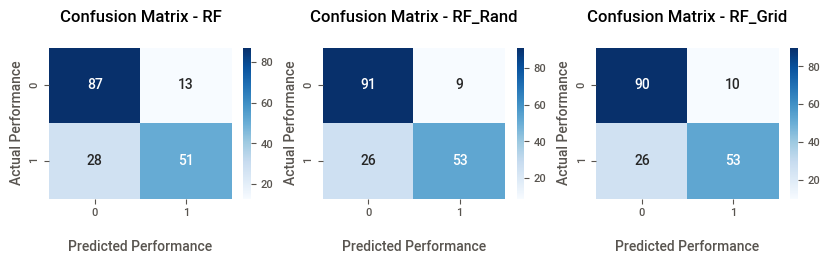

In [64]:
# Get the predicted results (TP,FP,TN,FN) using confusion matrix

cm1 = confusion_matrix(y_test, y_rf)
cm2 = confusion_matrix(y_test, y_rand_rf)
cm3 = confusion_matrix(y_test, y_grid_rf)

plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
ax = sns.heatmap(cm1, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - RF\n')
ax.set_xlabel('\nPredicted Performance')
ax.set_ylabel('Actual Performance')

plt.subplot(1,3,2)
ax = sns.heatmap(cm2, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - RF_Rand\n')
ax.set_xlabel('\nPredicted Performance')
ax.set_ylabel('Actual Performance')

plt.subplot(1,3,3)
ax = sns.heatmap(cm3, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - RF_Grid\n')
ax.set_xlabel('\nPredicted Performance')
ax.set_ylabel('Actual Performance')

plt.show()

* *RF_Rand* outperform the others due to the highest predicted TP and TN. Conversely, the RF shown the worst results.
* This also proven the previous discussion, where model with highest accuracy score might not be the best model.

###### 7.4.2 Precision, Recall, F-Score

In [65]:
# Get the overall precision, recall and f-score of the model

overall_score = pd.DataFrame({
    'Trained_Model':['RF','RF_Rand','RF_Grid'],
    'Precision': [precision_score(y_test, y_rf), 
                  precision_score(y_test, y_rand_rf),
                  precision_score(y_test, y_grid_rf)],
    'Recall': [recall_score(y_test, y_rf),
               recall_score(y_test, y_rand_rf),
               recall_score(y_test, y_grid_rf)],
    'F-score': [f1_score(y_test, y_rf),
                f1_score(y_test, y_rand_rf),
                f1_score(y_test, y_grid_rf)]
})

result_score = overall_score.sort_values(by=['F-score'], ascending=False)
result_score

,Trained_Model,Precision,Recall,F-score
1,RF_Rand,0.854839,0.670886,0.751773
2,RF_Grid,0.841270,0.670886,0.746479
0,RF,0.796875,0.645570,0.713287


* These results also proven that RF_Rand outperforms the others.
* The RF_Rand result shown that the model predicts a passenger survival with 86% of the time correctly (precision). While the recall shown that the model predicted the survival of 70% of the people who actually dead.
* The F-score is the mean of precision and recall. In this model, the F-score obtained is 77%, which is not so high as the recall score is slightly lower.

###### 7.4.3 Precision Recall Curve

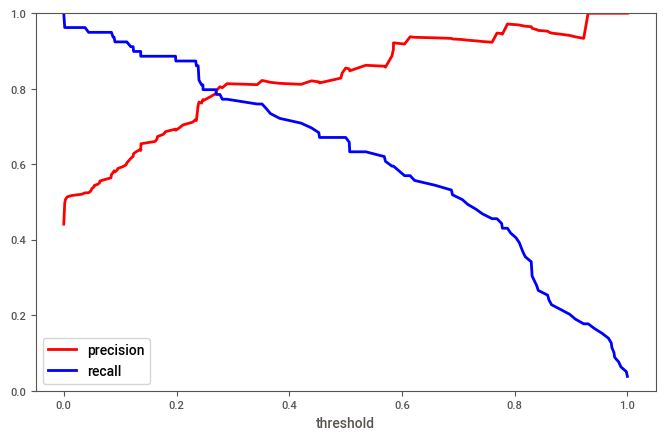

In [66]:
# Visualize the precision recall curve

y_score = rand_rf.predict_proba(x_test)
y_score = y_score[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_score)

def plot_pre_rec(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label='precision', linewidth=2)
    plt.plot(threshold, recall[:-1], 'b', label='recall', linewidth=2)
    plt.xlabel('threshold', fontsize=10)
    plt.legend(loc='lower left', fontsize=10)
    plt.ylim([0,1])
    
plt.figure(figsize=(8,5))
plot_pre_rec(precision, recall, threshold)
plt.show()

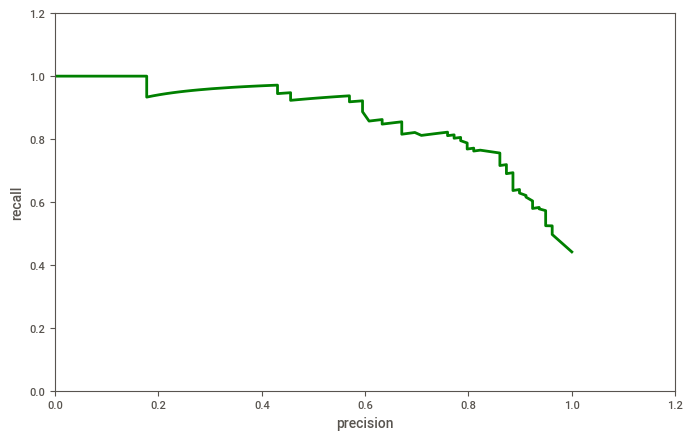

In [67]:
# plot another graph with precision vs recall

def plot_pre_vs_rec(precision, recall):
    plt.plot(recall, precision, "g-", linewidth=2)
    plt.ylabel('recall', fontsize=10)
    plt.xlabel('precision', fontsize=10)
    plt.axis([0,1.2,0,1.2])

plt.figure(figsize=(8,5))
plot_pre_vs_rec(precision, recall)
plt.show()

###### 7.4.4 ROC AUC Curve

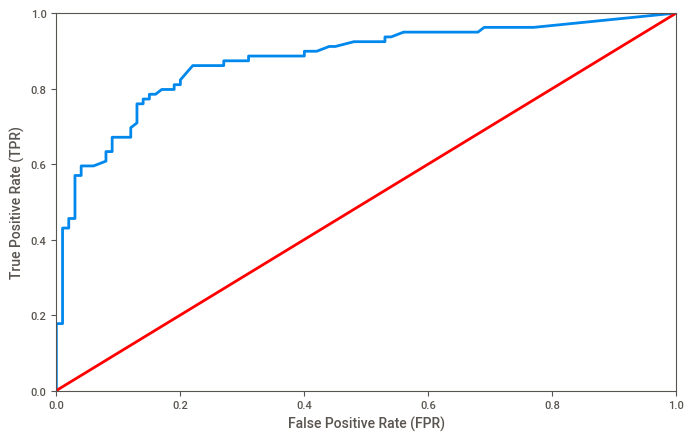

In [68]:
# Check the ROC AUC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)

def plot_roc(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'r', linewidth=2)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=10)
    plt.ylabel('True Positive Rate (TPR)', fontsize=10)
    
plt.figure(figsize=(8,5))
plot_roc(false_positive_rate, true_positive_rate)
plt.show()

* The result shown that this model is not bad as the blue predicted curve is far from the red straight line

In [69]:
# Get ROC AUC score

ra_score = roc_auc_score(y_test, y_score)
print("ROC-AUC Score: ", ra_score)

ROC-AUC Score:  0.8766455696202532


## 8 - PREDICTION

###### 8.1 Data Preparation

In [70]:
# Prepare the data for later application of trained model for prediction

test_set = prep(test_df)
test_set.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person,Age_Class
0,1.0,0.25,0.000,0.000000,0.00,0.2,0,1,0,1,0,0.0,1.0,0.00,0.250000
1,1.0,0.75,0.125,0.000000,0.00,0.6,1,0,0,0,1,0.1,0.0,0.00,0.750000
2,0.5,0.50,0.000,0.000000,0.25,0.2,0,1,0,1,0,0.0,1.0,0.25,0.333333
3,1.0,0.75,0.000,0.000000,0.25,0.2,0,1,0,0,1,0.0,1.0,0.25,0.750000
4,1.0,0.75,0.125,0.166667,0.50,0.6,1,0,0,0,1,0.2,0.0,0.00,0.750000


In [71]:
# Check if any null 

test_set.isnull().sum().sum()

0

###### 8.2 Prediction

In [72]:
# The predicted results

test_set['Results'] = rand_rf.predict(test_set)
test_set.head()

,Pclass,Age,SibSp,Parch,Fare,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,Not_Alone,Fare_Per_Person,Age_Class,Results
0,1.0,0.25,0.000,0.000000,0.00,0.2,0,1,0,1,0,0.0,1.0,0.00,0.250000,0
1,1.0,0.75,0.125,0.000000,0.00,0.6,1,0,0,0,1,0.1,0.0,0.00,0.750000,0
2,0.5,0.50,0.000,0.000000,0.25,0.2,0,1,0,1,0,0.0,1.0,0.25,0.333333,0
3,1.0,0.75,0.000,0.000000,0.25,0.2,0,1,0,0,1,0.0,1.0,0.25,0.750000,0
4,1.0,0.75,0.125,0.166667,0.50,0.6,1,0,0,0,1,0.2,0.0,0.00,0.750000,1


In [73]:
# Final outputs of test dataset

output = pd.DataFrame({'PassengerId' : test_df.PassengerId, 
                       'Survived' : test_set.Results})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 9 - EXPORT RESULTS AND SAVE MODELS

###### 9.1 Export Predicted Results

In [74]:
# # Save to csv file for submission

# output.to_csv('submission3.csv', index=False)
# print('File saved successfully!')

###### 9.2 Save Models

In [75]:
# # Save the random forest model

# filename = 'rand_rf_model.pkl'
# pickle.dump(rand_rf, open(filename, 'wb'))

In [76]:
# # Test the random forest model

# model = pickle.load(open(filename, 'rb'))
# result = model.predict(x_test)
# result

In [77]:
# # Save the data preparation function

# filename2 = 'minmax.pkl'
# pickle.dump(mm, open(filename2, 'wb'))

In [78]:
# # Test the function

# clean = pickle.load(open(filename2, 'rb'))
# clean_df = clean(test_df)
# clean_df